# Linear and Logistic Regression Analysis

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split

In [26]:
df = pd.read_csv("Datasets/insurance.csv")
df.head

<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

The dataset consists of 1338 examples with 7 columns. The columns are:
- age
- sex
- bmi
- children(number of children)
- smoker(yes or no)
- region
- charges

Let's examine each of the features and their effects on the charges of insurance. 

## Analysis of Age vs Charges

In [27]:
#extract the column 'age' and turn it into nparray
age = df['age'].to_numpy()
print(f"The data has shape {age.shape} and type {type(age)}")

#extract the column 'charges' and turn it into nparray
charges = df['charges'].to_numpy()
print(f"The data has shape {charges.shape} and type {type(charges)}")

The data has shape (1338,) and type <class 'numpy.ndarray'>
The data has shape (1338,) and type <class 'numpy.ndarray'>


Text(0.5, 0, 'Age')

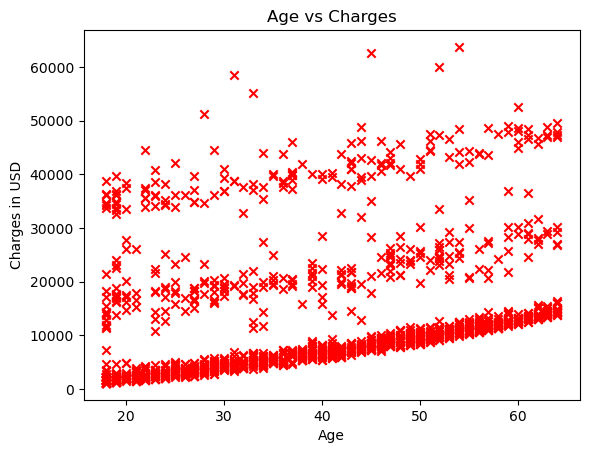

In [28]:
plt.scatter(age, charges, marker = 'x', c='r')
plt.title("Age vs Charges")
plt.ylabel("Charges in USD")
plt.xlabel("Age")

Examining some identities that stand out from the graph above, there seems to be a strong linear relationship for the insurance charges especially those that are lower than 10,000 usd. Nonetheless, the charges above $10,000 also show a linear correlation. Hence, linear analysis on age seems to be an appropriate choice. 

## Linear regression analysis on Age vs Charges

In [42]:
X = np.array(df['age']).reshape(-1, 1)
y = np.array(df['charges']).reshape(-1, 1)

df.dropna(inplace = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regr = LinearRegression()
 
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.019373806956744066


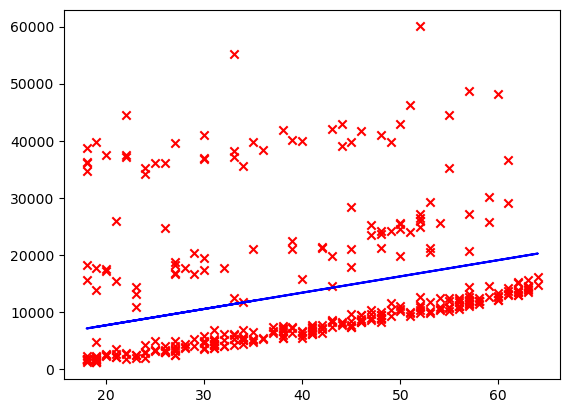

In [45]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='r', marker = 'x')
plt.plot(X_test, y_pred, color ='b')
 
plt.show()

Although the linear regression on the effects of age on insurance charges give an insight to predicting the charges, the single feature -age- alone is incapable of explaining how the prices for some people of same age differ as much as 3 or 4 more times. Hence, analysis on different factors and their effects on prices should be examined. 

# Effects of different features on charges

I will first start by finding the correlation of the features on the charges.
Before we do, the features that aren't numerical have to be changed.

In [50]:
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [51]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

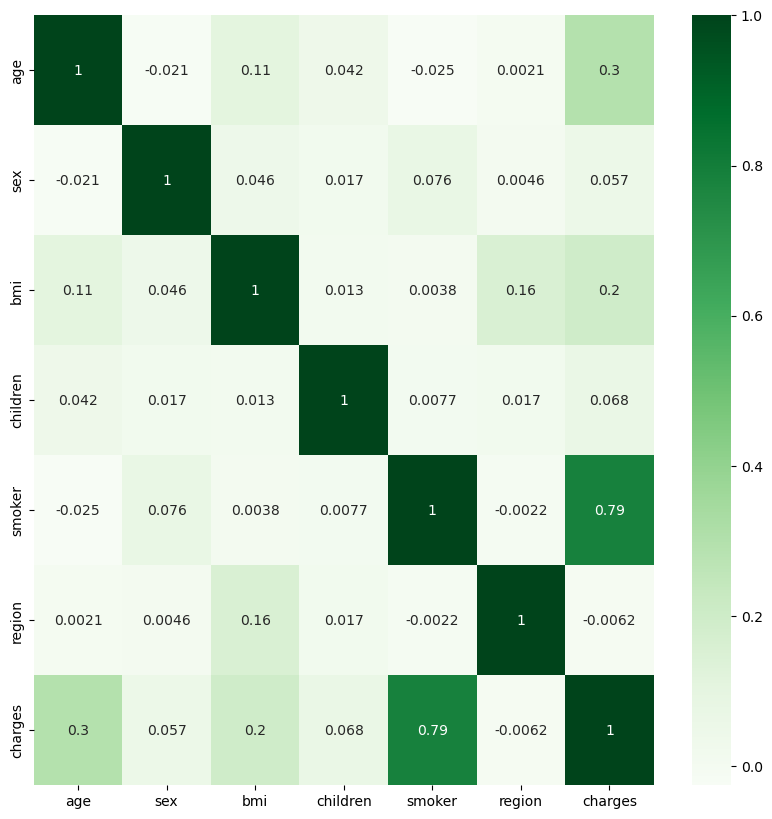

In [55]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='Greens')

Looking at the last row of the heatmap suggests that smoking has the greatest correlation with charges, followed by age, bmi, children, sex, and region in decreasing order of correlation. Hence we will use the top 3 features in the analysis: 
- smoke
- age
- bmi

Because smoking is a categorical data, let's look at bmi and its effects on charges.

In [56]:
X = np.array(df['bmi']).reshape(-1, 1)
y = np.array(df['charges']).reshape(-1, 1)

df.dropna(inplace = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regr = LinearRegression()
 
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.03790008052290228


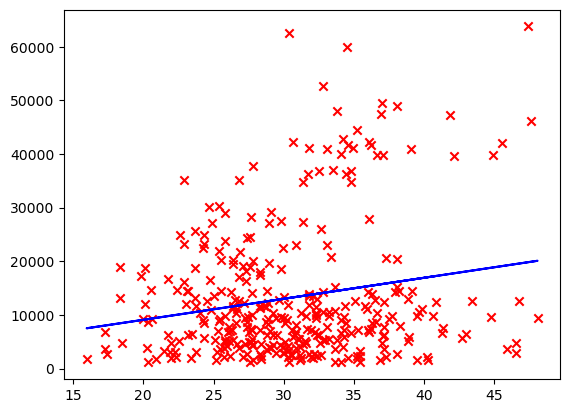

In [57]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='r', marker = 'x')
plt.plot(X_test, y_pred, color ='b')
 
plt.show()

Now, the effect of smoking on each of the two factors, 

/Users/yumin/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/yumin/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


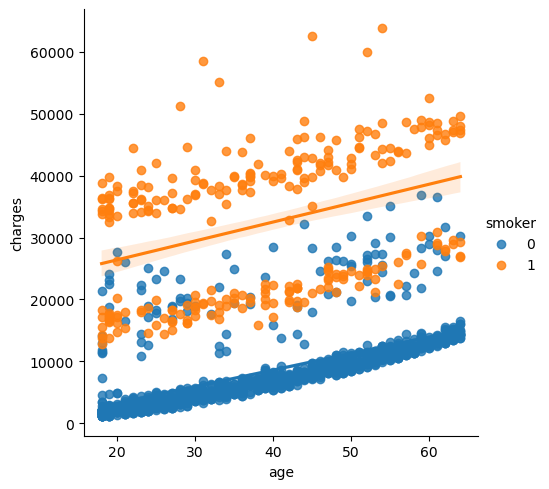

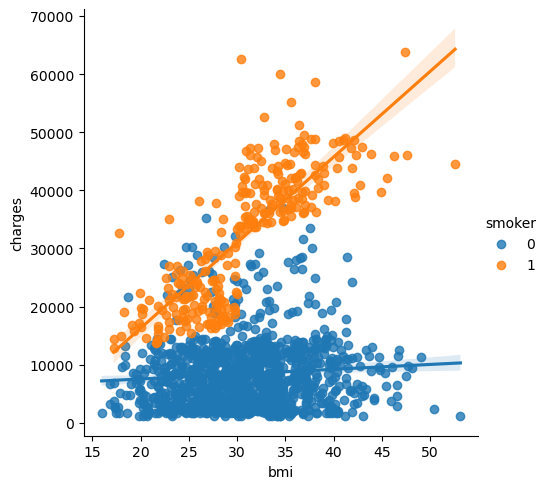

In [63]:
sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker')
sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker')

In [69]:
x = df.drop(['sex', 'children', 'region','charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-11571.908016839925
[  257.04066602   321.83997719 23625.23448834]
0.7945500805653087


The previous comment just performed a linear regression analysis on the 3 features: age, bmi, smoker. The vector given by **Lin_reg.coef_** are the linear slope vector for the 3 different features. But the different features may not behave linearly. Then we can apply the polynomial regression algorithm. 

In [71]:
from sklearn.preprocessing import PolynomialFeatures
x = df.drop(['sex', 'children', 'region','charges'], axis = 1)
y = df.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))

-6220.197801424276
[ 0.00000000e+00  7.03334822e+01  4.98130645e+02 -9.73998136e+03
  1.53678215e+00  2.40254198e+00  2.60895141e+00 -9.19302545e+00
  1.41047824e+03 -9.73998136e+03]
0.8773278585856419


In [72]:
y_test_pred = Pol_reg.predict(x_test)


df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

Actual     Predicted
578    9724.53000  12024.692707
610    8547.69130  10496.894369
569   45702.02235  48315.279212
1034  12950.07120  14989.997621
198    9644.25250   9571.787670
...           ...           ...
1084  15019.76005  15231.816546
726    6664.68595   8776.881502
1132  20709.02034  13447.173368
725   40932.42950  41198.503812
963    9500.57305   9706.591347

[268 rows x 2 columns]